In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
model=torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in /home/rohan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-29 Python-3.10.16 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3799MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [8]:
img='https://www.shutterstock.com/image-photo/nakhonsawan-thailand-july-2024-traffic-260nw-2495111879.jpg'
result=model(img)
result.print()

/home/rohan/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 280x389 2 persons, 7 cars, 2 motorcycles, 2 trucks
Speed: 728.0ms pre-process, 33.0ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)


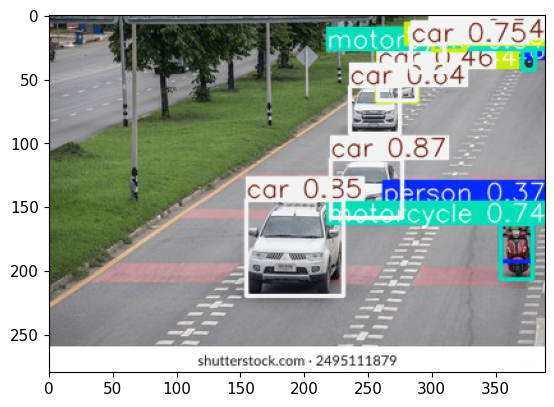

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [10]:
import os
import uuid
import time

In [11]:
images_path=os.path.join('data','images')
labels=['happy','sad','angry']
num_imgs=15

In [24]:
cap=cv.VideoCapture(0)
for label in labels:
    print('Collecting images for the label:{}',format(label))
    time.sleep(5)
    for each_img in range(num_imgs):
        print('Collecting images for label {} with image number {}',format(label,str(each_img)))
        ret,frame=cap.read()
        imgName=os.path.join(images_path,label+'.'+str(uuid.uuid1())+'.jpg')
        cv.imwrite(imgName,frame)
        cv.imshow("Image Collection",frame)
        time.sleep(3)
        
        if cv.waitKey(10) & 0xFF==ord('q'):
            break
cap.release()
cv.destroyAllWindows()

QObject::moveToThread: Current thread (0x2ef73c10) is not the object's thread (0x309aed40).
Cannot move to target thread (0x2ef73c10)

QObject::moveToThread: Current thread (0x2ef73c10) is not the object's thread (0x309aed40).
Cannot move to target thread (0x2ef73c10)

QObject::moveToThread: Current thread (0x2ef73c10) is not the object's thread (0x309aed40).
Cannot move to target thread (0x2ef73c10)

QObject::moveToThread: Current thread (0x2ef73c10) is not the object's thread (0x309aed40).
Cannot move to target thread (0x2ef73c10)

QObject::moveToThread: Current thread (0x2ef73c10) is not the object's thread (0x309aed40).
Cannot move to target thread (0x2ef73c10)

QObject::moveToThread: Current thread (0x2ef73c10) is not the object's thread (0x309aed40).
Cannot move to target thread (0x2ef73c10)

QObject::moveToThread: Current thread (0x2ef73c10) is not the object's thread (0x309aed40).
Cannot move to target thread (0x2ef73c10)

QObject::moveToThread: Current thread (0x2ef73c10) is n

In [13]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [14]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [21]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

2025-01-29 19:30:16.011951: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-29 19:30:16.011984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-29 19:30:16.012765: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, o

In [ ]:
model=torch.hub.load('ultralytics/yolov5','custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/rohan/.cache/torch/hub/master.zip


In [ ]:
test_img=os.path.join('data','images','happy.270056c2-ddff-11ef-896d-e0d045489fb8.jpg')
test_result=model(test_img)
test_result.print()

In [ ]:
plt.imshow(np.squeeze(test_result.render()))

In [ ]:
cap=cv.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    results=model(frame)
    cv.imshow('Expressions Detector', np.squeeze(results.render()))
    if cv.waitKey(10) & 0xFF==ord('q'):
        break;
cap.release()
cv.destroyAllWindows()

# 